<a href="https://colab.research.google.com/github/mshsu/probasets/blob/main/notebooks/olympics_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Olympics Demo

What kind of Olympics event results follow a Bivariate Normal distribution? More on the data [here](http://www.olympedia.org/event_names). Due to the inconsistent nature of Olympics scoring and standards, we will use only results from 2012, 2016 and 2020 (the 3 most recent).

## Setup

In [ ]:
!pip install symbulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from symbulate import *
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

## Floor Exercise

### Data

In [ ]:
ofloor = pd.read_csv("https://mshsu.github.io/probasets/data/OlympicFloor.csv", encoding = 'unicode_escape')
ofloor

,Year,Pos,Athlete,Country,D,E,Gender
0,2020,1.0,Artem Dolgopyat,ISR,6.6,8.600,M
1,2020,2.0,Nikita Nagorny,ROC,6.2,8.866,M
2,2020,3.0,Ryu Seong-Hyun,KOR,6.9,8.166,M
3,2020,4.0,Ray Zapata,ESP,6.5,8.541,M
4,2020,5.0,Kim Han-Sol,KOR,6.5,8.400,M
...,...,...,...,...,...,...,...
459,2012,78.0,Zoi Lima,POR,5.1,7.100,F
460,2012,79.0,Moldir Azimbay,KAZ,4.8,7.400,F
461,2012,80.0,Daniele Hypólito,BRA,5.4,5.900,F
462,2012,81.0,Lorena Quiñones,PUR,5.1,6.200,F


<Axes: xlabel='D', ylabel='E'>

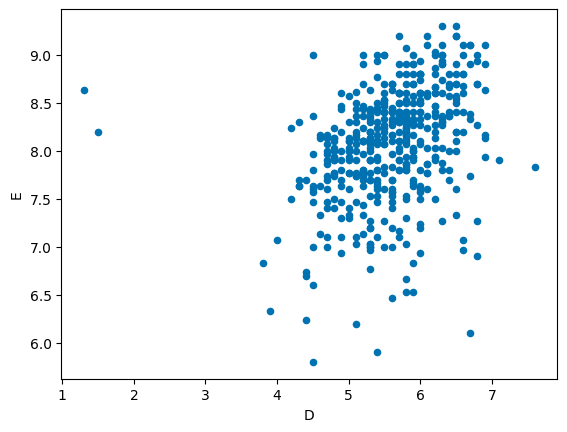

In [ ]:
ofloor.plot.scatter('D', 'E')

### Marginal Distributions

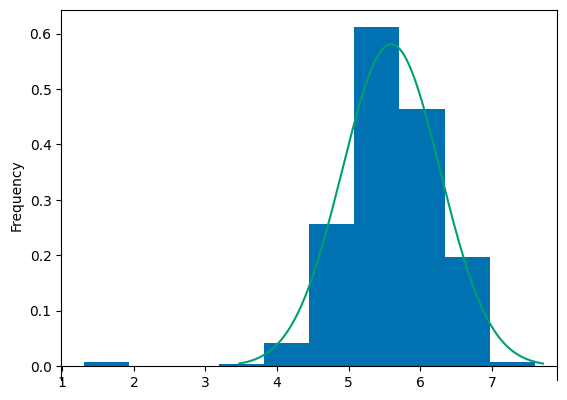

In [ ]:
ofloor['D'].plot.hist(density=True)

xbar1 = ofloor['D'].mean()
s1 = ofloor['D'].std()
Normal(xbar1, s1).plot()

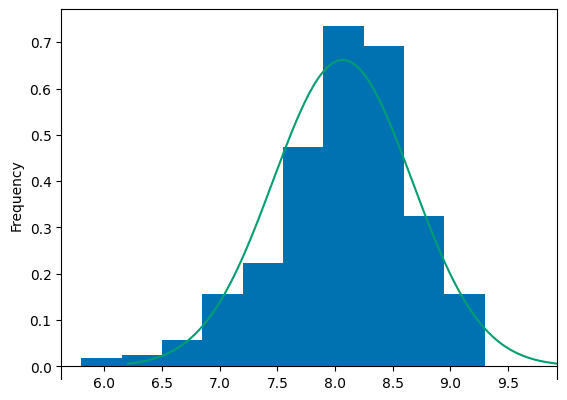

In [ ]:
ofloor['E'].plot.hist(density=True)

xbar2 = ofloor['E'].mean()
s2 = ofloor['E'].std()
Normal(xbar2, s2).plot()

### Joint Distribution

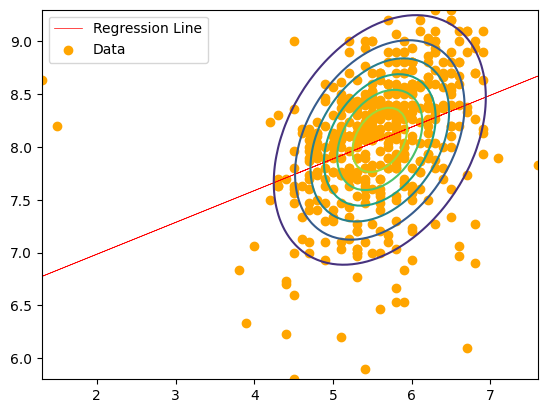

In [ ]:
# TODO: Convert contour plot to symbulate heatmap once symbulate heatmap
#   colormap has been changed to viridis.

# define obs
ofloor2 = ofloor.dropna()
x_obs = ofloor2['D']
y_obs = ofloor2['E']

# define the mean and covariance matrix of the bivariate normal distribution
mean = [xbar1, xbar2]
cov = np.matrix(ofloor[['D', 'E']].cov())

# create a meshgrid of x and y values
x, y = np.meshgrid(np.linspace(x_obs.min(), x_obs.max(), 100), 
                   np.linspace(y_obs.min(), y_obs.max(), 100))

# calculate the PDF values at each point on the meshgrid
pos = np.dstack((x, y))
z = np.zeros_like(x)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z[i, j] = multivariate_normal(mean=[xbar1, xbar2], 
                                      cov=ofloor[['D', 'E']].cov()).pdf(pos[i, j])
        if z[i, j] == 0:
            z[i, j] = np.nan

# create linear model
reg = LinearRegression()
reg.fit(x_obs.values.reshape(-1, 1), y_obs)
y_pred = reg.predict(x_obs.values.reshape(-1, 1))

# add regression line
# fig = plt.gca().set_facecolor('black')
plt.plot(x_obs, y_pred, color='red', label='Regression Line', lw=0.5)

# create a heatmap of the PDF values
plt.contour(x, y, z)

# add data
plt.scatter(x_obs, y_obs, color="orange", label='Data')

# display the plot
plt.legend()
plt.show()

### Descriptive Statistics

In [ ]:
r = ofloor[['D', 'E']].corr().iloc[0,1]
print("Difficulty Score: mean = %.5g   sd = %.5g" % (xbar1, s1))
print(" Execution Score: mean = %.5g   sd = %.5g" % (xbar2, s2))
print("                  cov  = %.4g  corr = %.4g" % (cov[0,1], r))

Difficulty Score: mean = 5.5939   sd = 0.68672
 Execution Score: mean = 8.0665   sd = 0.60289
                  cov  = 0.142  corr = 0.343


# More to come!

Feel free to send me suggestions.